In [1]:
import time as time
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')

from CDDP import *

dynamics_sym = simple_pen_sym
dynamics_fd = njit(simple_pen, cache=True)

n_x, n_u = 2, 1
x,u,dt = GetSyms(n_x, n_u)

N = 100


## Jacobian results check (x)
    - Symbolic and finte difference give the same results

In [3]:
f = sp.Matrix(RK4_sym(dt,x,u,dynamics_sym))
f_x = f.jacobian(x)
f_u = f.jacobian(u)

f_sym = sympy_to_numba(f,[dt,x,u])
f_x_sym = sympy_to_numba(f_x,[dt,x,u])
f_u_sym = sympy_to_numba(f_u,[dt,x,u])
 
dt0, x0, u0 = np.array([.05]), np.random.rand(n_x), np.random.rand(n_u)
print(f_x_sym(dt0, x0, u0))
print(f_u_sym(dt0, x0, u0))

f_xu = finiteDiff(RK4,dynamics_fd, x0, u0, dt0, 1e-4, vec='u')
print(f_xu)

[[ 0.97809625  0.0491393 ]
 [-0.86758217  0.9585629 ]]
[0.00494843 0.19656167]
[[0.00494843]
 [0.19656167]]


## using pickle to store and load compiled function

In [ ]:
import pickle

with open('cache/f_x_sym.pkl', 'wb') as file:
    pickle.dump(f_x_sym, file)
with open('cache/f_u_sym.pkl', 'wb') as file:
    pickle.dump(f_u_sym, file)
    
with open('cache/f_x_sym.pkl', 'rb') as file:
    f_x_sym = pickle.load(file)
with open('cache/f_u_sym.pkl', 'rb') as file:
    f_u_sym = pickle.load(file)

## Computational time comparison
    -- Looks like both methods take the same amount of time

9.870352820926892e-10
1.4412884565725555e-09
1.2058085528227375e-09
1.4190596797587953e-09
1.4129503690474529e-09
1.1142161739289487e-09
1.074477242042418e-09
1.5587652998822268e-09
1.5487571285029263e-09
1.559850211810022e-09
1.4208731209103267e-09
9.13666224568009e-10
1.5616212407093131e-09
1.3609008753216463e-09
1.3838381725928716e-09
1.3125323099234738e-09
9.295300713221706e-10
1.099098864253098e-09
1.0562302878811285e-09
1.1136496533080784e-09
9.440599486049073e-10
1.5464957067114631e-09
9.350063969036526e-10
1.3023437280893966e-09
1.5286976336023082e-09
1.4756083292548813e-09
1.380493026637022e-09
9.33528604855791e-10
1.365936734412217e-09
1.4675255582121193e-09
8.900985955619548e-10
1.1136871886125294e-09
1.3447997971530125e-09
1.563940292456108e-09
9.927024108551878e-10
1.5637833524786732e-09
9.319317835706694e-10
1.5204671780462683e-09
1.148716405957843e-09
9.668658285760138e-10
1.0128202728760137e-09
1.4190845025670616e-09
1.5397071687497343e-09
1.0821471516588027e-09
1.05364

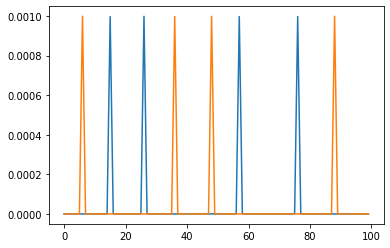

In [3]:
t_trace_sym = np.zeros(N)
t_trace_df = np.zeros(N)

for i in range(N):
    dt0, x0, u0 = np.array([.05]), np.random.rand(n_x), np.random.rand(n_u)
    
    tStart = time.time()
    f_xu = np.c_[f_x_sym(dt0, x0, u0), f_u_sym(dt0, x0, u0)]
    t_trace_sym[i] = time.time() - tStart
    
    tStart = time.time()
    f_xu_df = finiteDiff(RK4,dynamics_fd, x0, u0, dt0, 1e-4)
    t_trace_df[i] = time.time() - tStart
    
    # print('{:.8f}'.format(t_trace_sym[i]))
    print(np.linalg.norm(f_xu-f_xu_df))


plt.plot(t_trace_df)
plt.plot(t_trace_sym)
plt.show()
